<a href="https://colab.research.google.com/github/sergiopolimante/binary_classification/blob/main/Classifica%C3%A7%C3%A3o_Bin%C3%A1ria_com_Regress%C3%A3o_Log%C3%ADstica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt


In [2]:
# Load the breast cancer dataset (binary classification)
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

In [3]:
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [4]:
print(y.value_counts())
print(y.value_counts()/len(y)*100)

1    357
0    212
dtype: int64
1    62.741652
0    37.258348
dtype: float64


In [5]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=35) # 35 33

In [6]:
# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [7]:
# Make predictions on the test set
y_probs = model.predict_proba(X_test)[:, 1]
y_pred_default = model.predict(X_test)

In [8]:
# Calculate performance metrics for default threshold (0.5)
accuracy_default = accuracy_score(y_test, y_pred_default)
precision_default = precision_score(y_test, y_pred_default)
recall_default = recall_score(y_test, y_pred_default)
f1_default = f1_score(y_test, y_pred_default)
roc_auc_default = roc_auc_score(y_test, y_probs)


accuracy = accuracy_score(y_test, y_pred_default)
precision = precision_score(y_test, y_pred_default)
recall = recall_score(y_test, y_pred_default)
f1 = f1_score(y_test, y_pred_default)
roc_auc = roc_auc_score(y_test, y_probs)

print(f"Accuracy: {accuracy:.4f}, \nPrecision: {precision:.4f}, \nRecall: {recall:.4f}, \nF1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc}\n")

Accuracy: 0.9298, 
Precision: 0.9221, 
Recall: 0.9726, 
F1 Score: 0.9467
ROC AUC: 0.9682592716338123



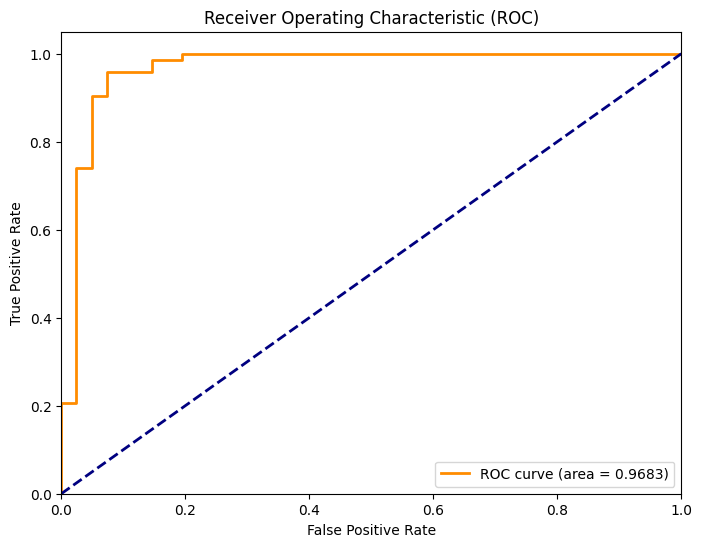

In [9]:
# Plot the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_probs)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_default:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [10]:


# Vary the threshold and calculate metrics
thresholds = [0.2, 0.4, 0.6, 0.8]
for threshold in thresholds:
    y_pred = (y_probs >= threshold).astype(int)
    # accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)


    print(f"Threshold = {threshold:.4f}")
    # print(f"Accuracy: {accuracy:.4f}, \nPrecision: {precision:.4f}, \nRecall: {recall:.4f}, \nF1 Score: {f1:.4f}")
    print(f"Precision: {precision:.4f}, \nRecall: {recall:.4f}, \nF1 Score: {f1:.4f}")

    print()


Threshold = 0.2000
Precision: 0.9114, 
Recall: 0.9863, 
F1 Score: 0.9474

Threshold = 0.4000
Precision: 0.9231, 
Recall: 0.9863, 
F1 Score: 0.9536

Threshold = 0.6000
Precision: 0.9333, 
Recall: 0.9589, 
F1 Score: 0.9459

Threshold = 0.8000
Precision: 0.9583, 
Recall: 0.9452, 
F1 Score: 0.9517



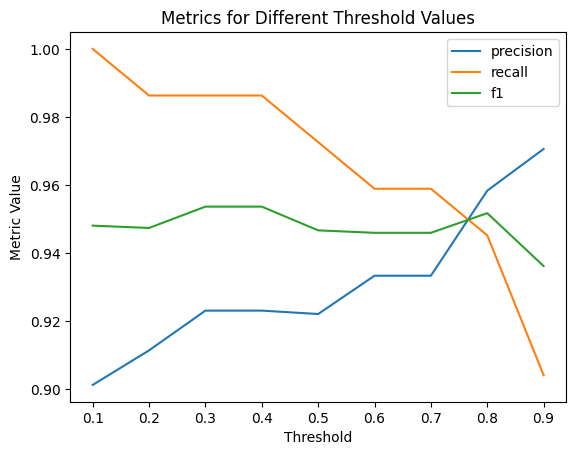

In [11]:


# Vary the threshold and calculate metrics
thresholds = [round(0.1 * i, 2) for i in range(1, 10)]

plot_data = []
for threshold in thresholds:
    y_pred = (y_probs >= threshold).astype(int)
    # accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    plot_data = plot_data + [[threshold, precision, recall, f1]]


plot_data = np.array(plot_data)
plt.plot(plot_data[:,0], plot_data[:,1], label='precision')
plt.plot(plot_data[:,0], plot_data[:,2], label='recall')
plt.plot(plot_data[:,0], plot_data[:,3], label='f1')

plt.xlabel('Threshold')
plt.ylabel('Metric Value')
plt.title('Metrics for Different Threshold Values')
plt.legend(loc="lower right")

plt.legend()